In [2]:
from lib import check_libs_installed

check_libs_installed()

All Required Installed


### Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from lib import get_file_path

### Import Dataset

In [4]:
df = pd.read_csv(get_file_path('Google-Playstore.csv'))

In [5]:
df = df.drop(['Scraped Time', 'Privacy Policy', 'Developer Email', 
                'Developer Website', 'Developer Id'], axis=1)

df.head().style.background_gradient(cmap='viridis', low=1)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.000000,0.000000,10+,10.000000,15,True,0.000000,USD,10M,7.1 and up,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.400000,64.000000,"5,000+",5000.000000,7662,True,0.000000,USD,2.9M,5.0 and up,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,com.doantiepvien.crm,Productivity,0.000000,0.000000,50+,50.000000,58,True,0.000000,USD,3.7M,4.0.3 and up,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UCS548,cst.stJoseph.ug17ucs548,Communication,5.000000,5.000000,10+,10.000000,19,True,0.000000,USD,1.8M,4.0.3 and up,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.000000,0.000000,100+,100.000000,478,True,0.000000,USD,6.2M,4.1 and up,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False


In [6]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Released', 'Last Updated', 'Content Rating',
       'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')

In [7]:
print("Shape of data :", df.shape)
print("Data types : \n", df.dtypes.value_counts())

Shape of data : (2312944, 19)
Data types : 
 object     10
float64     4
bool        4
int64       1
dtype: int64


### Check Na

In [8]:
data_info = pd.DataFrame()
data_info['Column Names'] = df.columns
data_info['Datatype'] = df.dtypes.to_list()
data_info['num_NA'] = data_info['Column Names'].apply(lambda x:df[x].isna().sum())
data_info['%_NA'] = data_info['Column Names'].apply(lambda x: df[x].isna().mean())
data_info

,Column Names,Datatype,num_NA,%_NA
0,App Name,object,2,8.646988e-07
1,App Id,object,0,0.000000e+00
2,Category,object,0,0.000000e+00
3,Rating,float64,22883,9.893452e-03
4,Rating Count,float64,22883,9.893452e-03
5,Installs,object,107,4.626139e-05
6,Minimum Installs,float64,107,4.626139e-05
7,Maximum Installs,int64,0,0.000000e+00
8,Free,bool,0,0.000000e+00
9,Price,float64,0,0.000000e+00


App Name 삭제\
Rating, Rating Count 삭제\
Installs, Minimum Install은 Rating, Rating Count 삭제시 같이 삭제됨\
Currency 삭제\
Minimum Android 삭제\
Released 삭제

--> 결측값 모두 삭제

<AxesSubplot:>

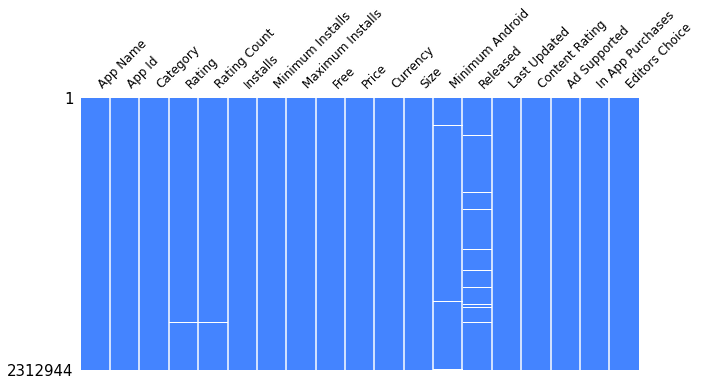

In [9]:
%matplotlib inline
msno.matrix(df, sparkline=False, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0))

### Check Duplicate

In [10]:
data_info = pd.DataFrame()
data_info['Column Names'] = df.columns
data_info['Datatype'] = df.dtypes.to_list()
data_info['Duplicate'] = data_info['Column Names'].apply(lambda x: df[x].duplicated().sum())
data_info

,Column Names,Datatype,Duplicate
0,App Name,object,134999
1,App Id,object,0
2,Category,object,2312896
3,Rating,float64,2312901
4,Rating Count,float64,2274461
5,Installs,object,2312921
6,Minimum Installs,float64,2312921
7,Maximum Installs,int64,2061381
8,Free,bool,2312942
9,Price,float64,2311881


App Name만 처리하면 됨\
--> Rating Count가 많은거만 남긴다 (Rating Count가 많은게 실사용되는 앱이라고 가정)

In [11]:
df['App Name'].loc[df['App Name'].duplicated(keep=False)].sort_values()

816638                                            #AKTIVIZIM
1754766                                           #AKTIVIZIM
1552890                                              #imOKru
683581                                               #imOKru
1181804                                                #team
                                 ...                        
216449     💎Stickers de Mikecrack y Los Compas para WhatsApp
1649333                                     🥠 Fortune Cookie
637015                                      🥠 Fortune Cookie
45686                                                    NaN
2117918                                                  NaN
Name: App Name, Length: 202486, dtype: object

In [12]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02
